In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('Houses.csv', encoding='latin-1')

In [5]:
data.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [6]:
data.dtypes

Unnamed: 0      int64
address        object
city           object
floor         float64
id            float64
latitude      float64
longitude     float64
price         float64
rooms         float64
sq            float64
year          float64
dtype: object

In [7]:
data.duplicated().sum()


0

In [8]:
data.isna().sum()

Unnamed: 0    0
address       0
city          0
floor         0
id            0
latitude      0
longitude     0
price         0
rooms         0
sq            0
year          0
dtype: int64


#### Cleaning the data

In [9]:
data_copy = data.copy(deep=True)
data_copy.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [10]:
ndc1 = data_copy.drop(columns=['Unnamed: 0','address','id'])
#Now, let's remove rows where year is less than 1800 and greater than 2022 and rows where sq is greater than 1000
# to remove the incorrectly given data.
ndc = ndc1[(ndc1.year >= 1800) & (ndc1.year <= 2022) & (ndc1.sq <=1000)]

ndc

,city,floor,latitude,longitude,price,rooms,sq,year
0,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,Poznañ,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...
23759,Poznañ,0.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,Warszawa,4.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,Poznañ,0.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,Kraków,6.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


In [11]:
#We also want to add column with price per square meter and square meters per room.
price_per_sq = ndc['price'] / ndc['sq']
ndc['price per sq'] = price_per_sq

sq_per_room = ndc['sq'] / ndc['rooms']
ndc['sq per room'] = sq_per_room
ndc.head()

,city,floor,latitude,longitude,price,rooms,sq,year,price per sq,sq per room
0,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,24.683333
1,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0,9866.611977,24.380000
2,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,18.500000
3,Poznañ,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0,7771.084337,33.200000
4,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0,9485.714286,21.000000


In [12]:
def city_name(row):
    if row == 'Poznañ':
        return 'Poznan'
    elif row == 'Kraków':
        return 'Krakow'
    else:
        return 'Warszawa'

ndc['city'] = ndc['city'].apply(lambda x: city_name(x))
ndc.head()

,city,floor,latitude,longitude,price,rooms,sq,year,price per sq,sq per room
0,Krakow,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,24.683333
1,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0,9866.611977,24.380000
2,Krakow,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,18.500000
3,Poznan,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0,7771.084337,33.200000
4,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0,9485.714286,21.000000


In [13]:
#we divide the data into 3 cities
ndc_waw = ndc[ndc["city"].isin(['Warszawa'])]
ndc_kra = ndc[ndc["city"].isin(['Krakow'])]
ndc_poz = ndc[ndc["city"].isin(['Poznan'])]


## distribution plots for price and price per square meter

### All 3 cities

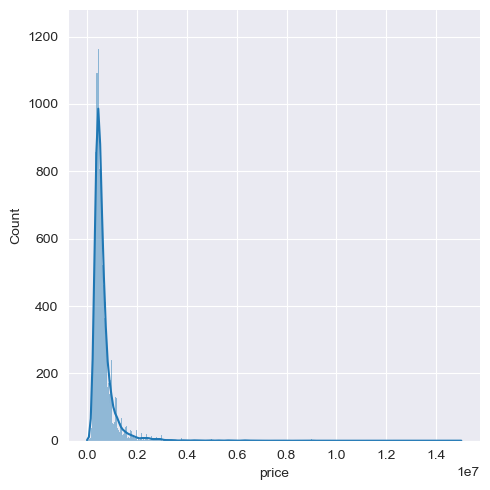

In [14]:
sns.displot(data=ndc['price'], kde=True)

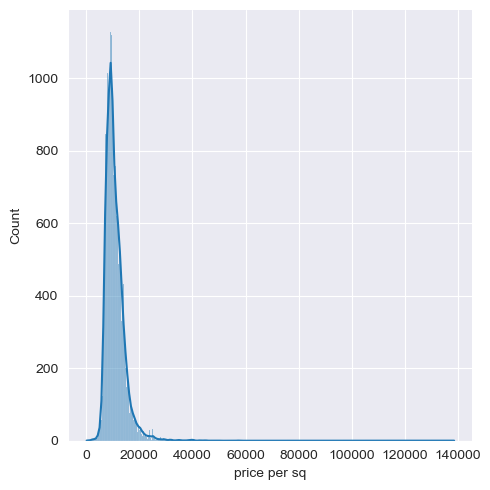

In [15]:
sns.displot(data=ndc['price per sq'], kde=True)

### Krakow

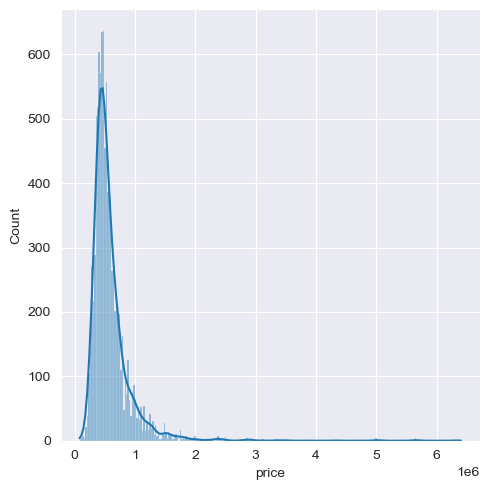

In [16]:
sns.displot(data=ndc_kra['price'], kde=True)

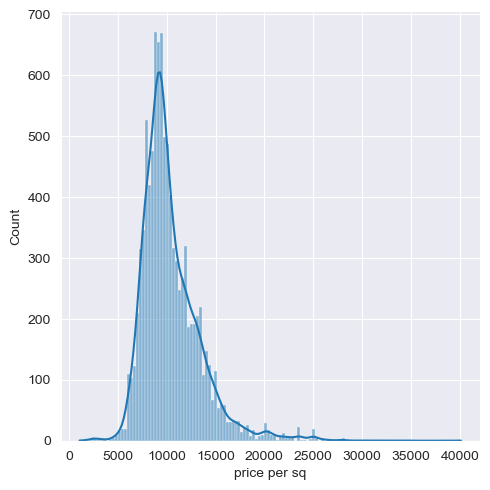

In [17]:

sns.displot(data=ndc_kra['price per sq'], kde=True)

### Poznan

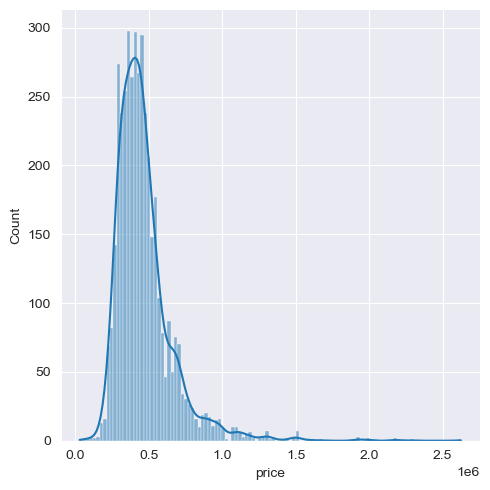

In [18]:

sns.displot(data=ndc_poz['price'], kde=True)

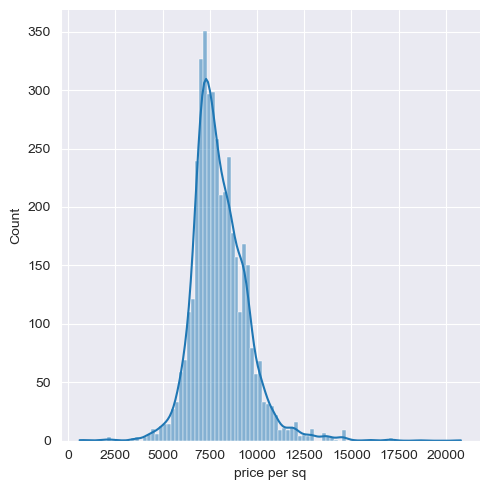

In [19]:
sns.displot(data=ndc_poz['price per sq'], kde=True)

### Warszawa

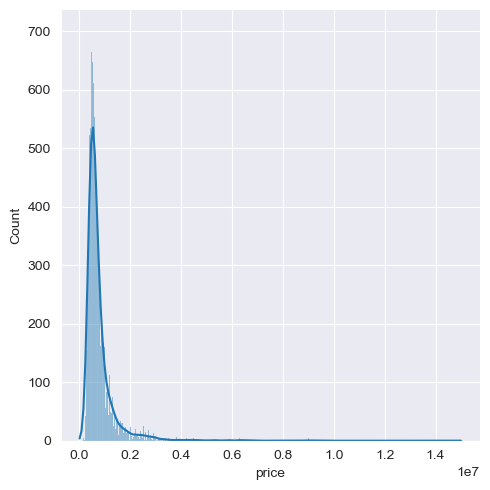

In [20]:
sns.displot(data=ndc_waw['price'], kde=True)


(0.0, 40000.0)

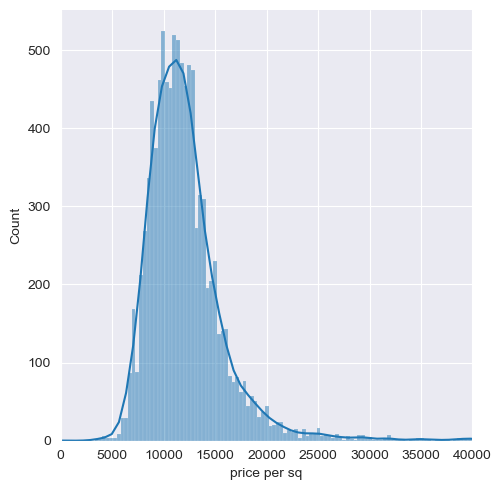

In [21]:
sns.displot(data=ndc_waw['price per sq'], kde=True)
plt.xlim(0, 40000)

## Sale price vs year built

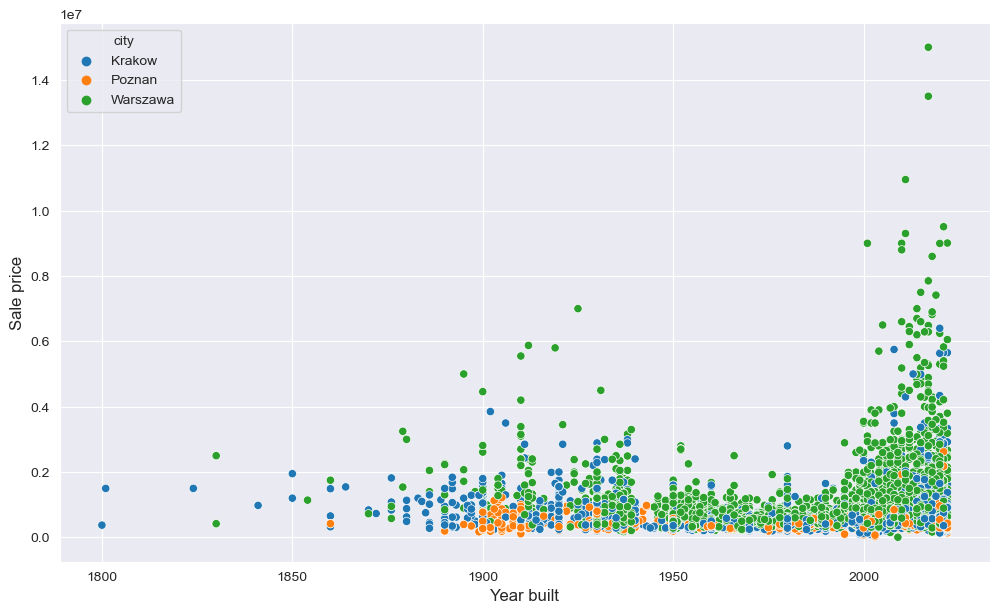

In [22]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='year', y='price', data=ndc, hue='city', hue_order = ['Krakow', 'Poznan', 'Warszawa'])
plt.xlabel('Year built', fontsize = 12)
plt.ylabel('Sale price', fontsize = 12)
plt.show()

## Sale price vs sq

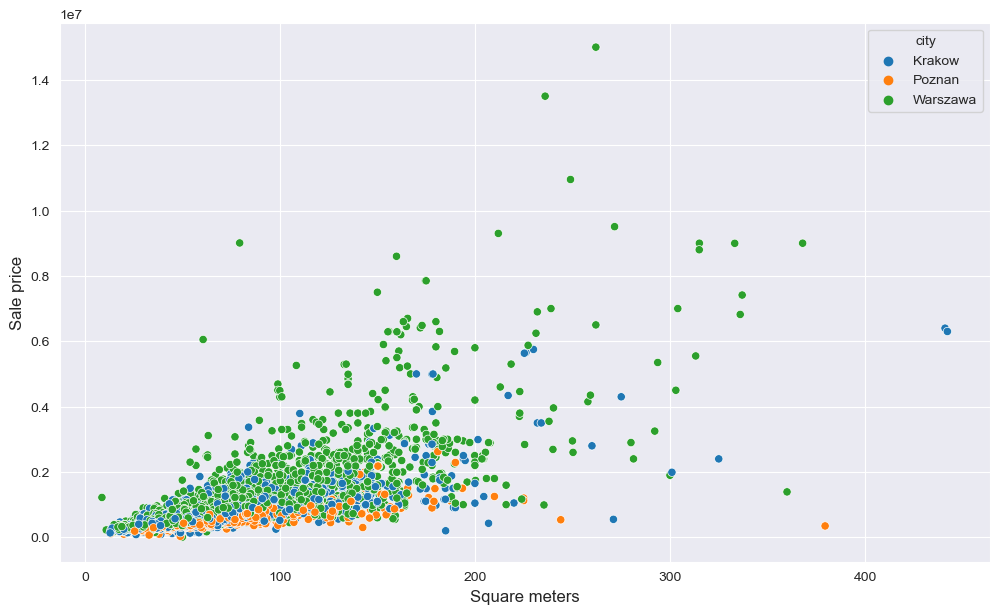

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='sq', y='price', data=ndc, hue='city', hue_order = ['Krakow', 'Poznan', 'Warszawa'])
plt.xlabel('Square meters', fontsize = 12)
plt.ylabel('Sale price', fontsize = 12)
plt.show()

### City histogram

<AxesSubplot:xlabel='city', ylabel='Count'>

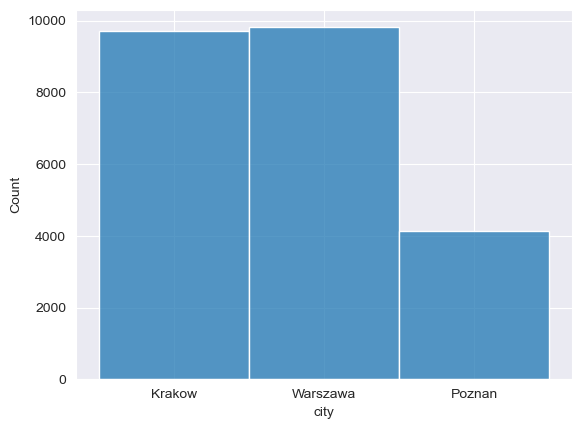

In [24]:
sns.histplot(data=ndc['city'])

### Heatmap

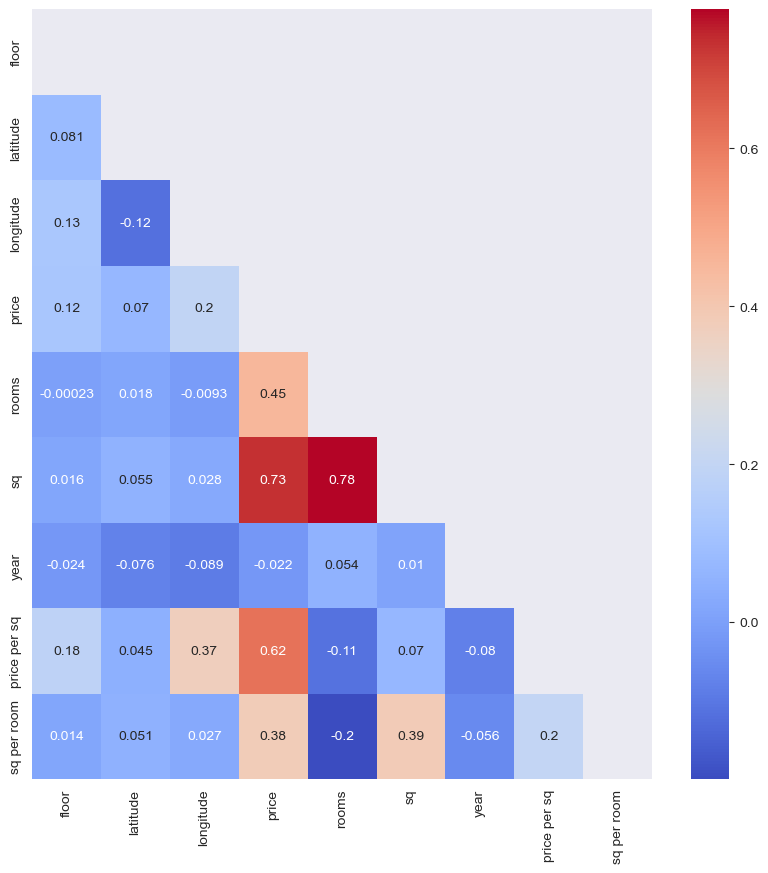

In [25]:
plt.figure(figsize=(10,10))
cor=ndc.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot = True, cmap=plt.cm.coolwarm)
plt.show()

### Scikit-learn model


In [26]:
df= pd.get_dummies(ndc, columns = ['city'])
df

,floor,latitude,longitude,price,rooms,sq,year,price per sq,sq per room,city_Krakow,city_Poznan,city_Warszawa
0,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,24.683333,1,0,0
1,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0,9866.611977,24.380000,0,0,1
2,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,18.500000,1,0,0
3,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0,7771.084337,33.200000,0,1,0
4,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0,9485.714286,21.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23759,0.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0,7051.948052,19.250000,0,1,0
23760,4.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0,12816.901408,23.666667,0,0,1
23761,0.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0,8500.000000,16.890000,0,1,0
23762,6.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0,9238.291302,19.430000,1,0,0


In [27]:
X = df.drop([ 'price', 'price per sq', 'sq per room'], axis =1)
y = df['price']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 55)

In [30]:
names = ['Linear Regression', 'SGD Regressor', 'Random Forest','K-Nearest Neighbors', 'Decision Tree', 'XGB Regressor']

models = [ LinearRegression(), SGDRegressor(),RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(), XGBRegressor()]



results = pd.DataFrame(columns = ['R^2'], index = names)
scores_R2=[]

for model in models:

    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    scores_R2.append(score)


results['R^2'] = scores_R2
results.sort_values(by = 'R^2', ascending = False)

,R^2
XGB Regressor,0.850063
Random Forest,0.843731
Decision Tree,0.737271
K-Nearest Neighbors,0.722496
Linear Regression,0.622097
SGD Regressor,0.619502


Let's focus on XGB Regressor

In [31]:
def get_score(n_estimators):
    xgb = XGBRegressor(n_estimators=n_estimators, learning_rate=0.05, random_state=55)

    xgb.fit(X_train, y_train)

    return xgb.score(X_test, y_test)

In [ ]:
results_xgb = {}
estimators = [1100, 1300, 1500, 1700, 1900, 2100, 2300]

for i in estimators:
    results_xgb[i] = get_score(i)

In [ ]:
plt.plot(list(results_xgb.keys()), list(results_xgb.values()))
plt.title("XGB Regressor n_estimators vs score")
plt.show()

In [ ]:
model = XGBRegressor(n_estimators=2300, learning_rate=0.05, random_state=55)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"final model MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"final model R^2: {model.score(X_test, y_test):.3f}")

In [ ]:
plt.figure(figsize=(16,9))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title("Actual vs Predicted Price", fontsize = 12)
plt.xlabel("Actual Price", fontsize = 12)
plt.ylabel("Predicted Price", fontsize = 12)
plt.xlim(0, 8000000)
plt.ylim(0, 8000000)
plt.show()

### XGBRegressor Feature Importance

In [ ]:
from matplotlib import pyplot
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()